## Estudando com a PI antiga 

In [1]:
import mysql.connector
from functools import partial


def get_connection_helper():

    def run_db_query(connection, query, args=None):
        with connection.cursor() as cursor:
            print('Executando query:')
            cursor.execute(query, args)
            for result in cursor:
                print(result)

    connection = mysql.connector.connect(
        host='localhost',
        user='megadados',
        password='megadados',
        database='xpto',
    )
    return connection, partial(run_db_query, connection)


connection, db = get_connection_helper()

### Questão 1:

Uma pizzaria quer informatizar seu cardápio para controlar melhor as pizzas que oferece. O diagrama do modelo
relacional mostrado abaixo demonstra a estrutura da informação que se deseja armazenar e consultar:

Temos as seguintes tabelas neste design:

• Tabela “tipo”: armazena os nomes dos tipos de ingrediente de pizza: vegano, sem gluten, sem
lactose, vegetariano, etc.
   
       o Campo “tipo”: o nome do tipo
    
• Tabela “ingrediente”: armazena informações à respeito dos ingredientes de pizza.
        
        o Campo “ingrediente”: o nome do ingrediente
        o Campo “preco_unitario”: o custo do ingrediente por unidade
    
• Tabela “ingredientetipo”: relaciona os ingredientes de pizza com seus tipos. Por exemplo: brócoli é
vegano, vegetariano, sem lactose e sem glutem, logo aparece quatro vezes nesta tabela.
        
        o Campo “ingrediente”: chave estrangeira para a tabela “ingrediente”
        o Campo “tipo”: chave estrangeira para a tabela “tipo”
    
• Tabela “pizza”: O cardápio da pizzaria
        
        o Campo “pizza”: o nome da pizza
        o Campo “preco”: o valor de venda da pizza

• Tabela “ingredientepizza”: mostra como cada pizza é feita
       
       o Campo “ingrediente”: chave estrangeira para a tabela de ingredientes
       o Campo “pizza”: chave estrangeira para a tabela de pizzas
       o Campo “quantidade”: quantas unidades deste ingrediente fazem parte desta pizza

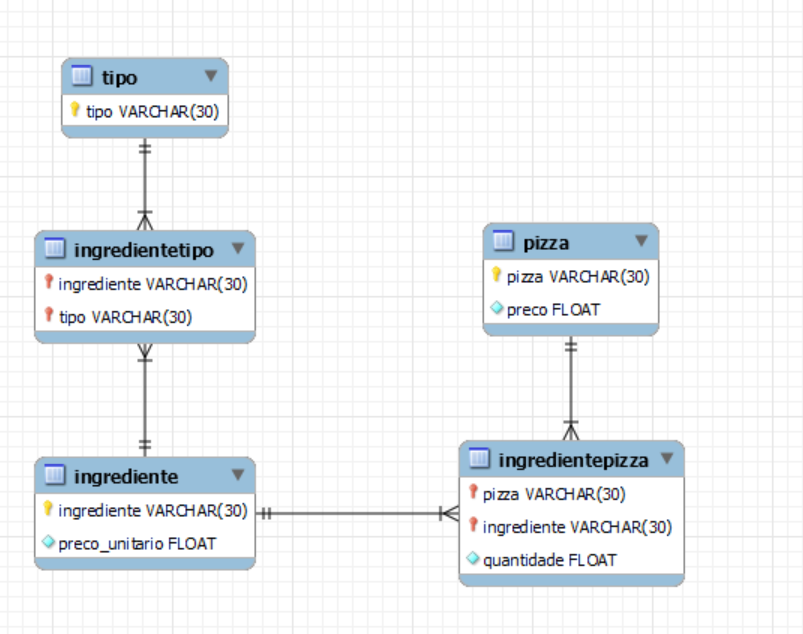

O script “script_001.sql” contem a DDL para criação do banco de dados e também a DML para inserção de
alguns valores de exemplo, para ajudar vocês a responder as questões da prova. Se quiser, adicione
exemplos à vontade. Nas perguntas a seguir construa código SQL para cumprir o que se pede

EXPLORE OS DADOS:


In [2]:
# Primeiro vamos explorar os dados

# PIZZAS:

db('SELECT * FROM pizza')

Executando query:
('calabresa', 100.0)
('incoerente', 200.0)
('legumes', 100.0)
('mussarela', 100.0)
('pão', 100.0)


In [3]:
# INGREDIENTE:

db('SELECT * FROM ingrediente')

Executando query:
('abobrinha', 5.0)
('calabresa', 30.0)
('massa', 5.0)
('massa sem gluten', 7.0)
('mussarela', 10.0)
('mussarela vegana', 20.0)
('picanha', 40.0)


In [4]:
# TIPO: 

db('SELECT * FROM tipo')

Executando query:
('sem gluten',)
('sem lactose',)
('vegana',)
('vegetariana',)


In [5]:
# INGREDIENTETIPO

db('SELECT * FROM ingredientetipo')

Executando query:
('abobrinha', 'sem gluten')
('calabresa', 'sem gluten')
('massa sem gluten', 'sem gluten')
('mussarela', 'sem gluten')
('mussarela vegana', 'sem gluten')
('picanha', 'sem gluten')
('abobrinha', 'sem lactose')
('calabresa', 'sem lactose')
('massa sem gluten', 'sem lactose')
('mussarela vegana', 'sem lactose')
('picanha', 'sem lactose')
('abobrinha', 'vegana')
('massa sem gluten', 'vegana')
('mussarela vegana', 'vegana')
('abobrinha', 'vegetariana')
('massa', 'vegetariana')
('massa sem gluten', 'vegetariana')
('mussarela', 'vegetariana')
('mussarela vegana', 'vegetariana')


In [6]:
# INGREDIENTEPIZZA

db('SELECT * FROM ingredientepizza')

Executando query:
('calabresa', 'calabresa', 3.0)
('calabresa', 'massa', 1.0)
('incoerente', 'massa sem gluten', 1.0)
('incoerente', 'mussarela', 1.0)
('incoerente', 'mussarela vegana', 1.0)
('incoerente', 'picanha', 2.0)
('legumes', 'abobrinha', 3.0)
('legumes', 'massa sem gluten', 1.0)
('mussarela', 'massa', 1.0)
('mussarela', 'mussarela', 3.0)
('pão', 'massa', 1.0)


a) (1.0 pt) Liste as 3 pizzas que dão mais lucro. O lucro de uma pizza é o seu preço de venda menos o
custo total dos ingredientes nela utilizados (não se esqueça de que cada ingrediente da pizza tem uma
especificação de quantidade a ser utilizada).

In [36]:
# Lucro : preço - custo
db('''
SELECT
    pizza, (preco - SUM(preco_unitario*quantidade)) as lucro
FROM
    ingrediente
    INNER JOIN ingredientepizza USING (ingrediente)
    INNER JOIN pizza USING (pizza)
GROUP BY
    pizza  
ORDER BY 
    lucro DESC
LIMIT 
    3
''')

Executando query:
('pão', 95.0)
('incoerente', 83.0)
('legumes', 78.0)


b) (1.0 pt) Construa uma tabela temporária que liste todas as pizzas e a quantidade de ingredientes nela.

Quantidade de ingredientes diferentes nelaa!

In [37]:
db('DROP TABLE IF EXISTS pizza_qtd_ingrediente')

db('''
CREATE TEMPORARY TABLE pizza_qtd_ingrediente
    SELECT
        pizza, COUNT(DISTINCT ingrediente) as qtd_ingrediente
    FROM 
        ingredientepizza
    GROUP BY
        pizza
''')

db('SELECT * FROM pizza_qtd_ingrediente')

Executando query:
Executando query:
Executando query:
('calabresa', 2)
('incoerente', 4)
('legumes', 2)
('mussarela', 2)
('pão', 1)


c) (1.0 pt) Construa uma tabela temporária que liste todas as pizzas a quantidade de ingredientes
veganos nela (ou seja, onde o tipo é “vegana”)

In [49]:
db('DROP TABLE IF EXISTS pizza_qtd_veganos')

db('''
CREATE TEMPORARY TABLE pizza_qtd_veganos
    SELECT
        pizza, COUNT(DISTINCT ingrediente) as qtd_ingrediente
    FROM 
        ingredientepizza
        LEFT OUTER JOIN ingredientetipo USING (ingrediente)
    WHERE 
        tipo = 'vegana'
    GROUP BY
        pizza
''')


db('SELECT * FROM pizza_qtd_veganos')

Executando query:
Executando query:
Executando query:
('incoerente', 2)
('legumes', 2)


d) (1.0 pt) Usando as tabelas temporárias dos itens (b) e (c) – mesmo que você não os tenha feito – liste
as pizzas veganas da pizzaria. Uma pizza é vegana se todos os seus ingredientes são veganos.


In [50]:
db('''
SELECT
    pizza
FROM
    pizza_qtd_ingrediente
    INNER JOIN pizza_qtd_veganos USING (pizza)
WHERE
    pizza_qtd_ingrediente.qtd_ingrediente = pizza_qtd_veganos.qtd_ingrediente

''')

Executando query:
('legumes',)


e) (1.0 pt) Liste os ingredientes e seus tipos, um ingrediente por linha (Dica: use a função
GROUP_CONCAT). O resultado deve ser da seguinte forma:


In [55]:
db('''
SELECT
     ingrediente, GROUP_CONCAT(tipo SEPARATOR ", ")
FROM
    ingredientetipo
GROUP BY
    ingrediente

''')

Executando query:
('abobrinha', 'sem gluten, sem lactose, vegana, vegetariana')
('calabresa', 'sem gluten, sem lactose')
('massa', 'vegetariana')
('massa sem gluten', 'sem gluten, sem lactose, vegana, vegetariana')
('mussarela', 'sem gluten, vegetariana')
('mussarela vegana', 'sem gluten, sem lactose, vegana, vegetariana')
('picanha', 'sem gluten, sem lactose')


In [11]:
connection.close()

f) (1.0 pt) Construa o diagrama do modelo entidade-relacionamento correspondente ao diagrama do
modelo relacional acima. (Claro que normalmente a ordem de construção das coisas é o contrário
disso, mas aqui eu estou apenas explorando o conhecimento de vocês). Gere um arquivo PNG, JPG ou
PDF com a figura resultante e envie pelo Blackboard como resposta.

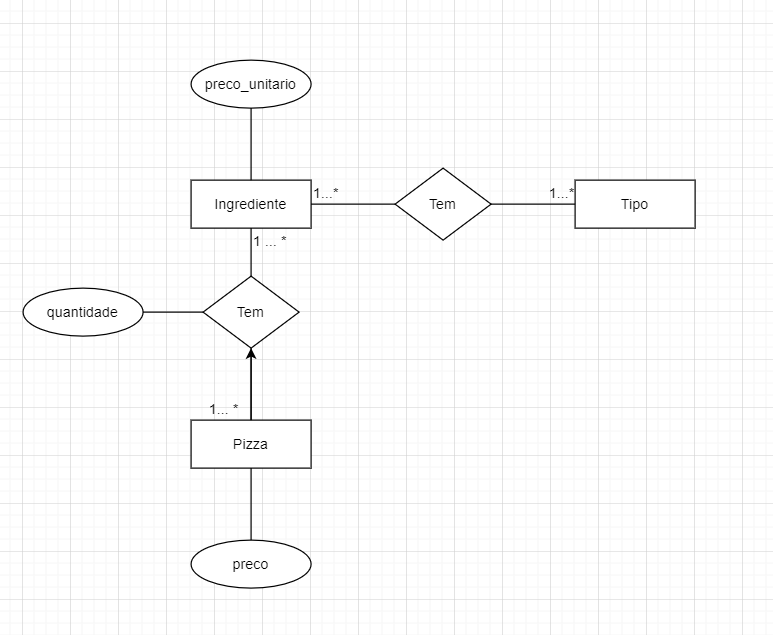

### Questão 3

b) (0.5 pts) Por que usar um sistema de gerenciamento de banco de dados e não um arquivo simples?

De fato, existem outras alternativas para um sistema de gerenciamento de bancos de dados, e isso porque nem sempre um banco de dados é necessário. Podem ser usados: um simples arquivo de texto, uma planilha Excel ou até um pedaço de papel. Mas,  precisamos considerar as seguintes situações: se o contexto envolve uma empresa, se há muitos usuários usando aquele arquivo de dados e se há muitos acessos, sem um gerenciamento de banco de dados provavelmente haverá fila para fazer acesso, lentidão, desorganização, mais complexidade para realizar certas operações, menor precisão e consistência, exposição de dados que deveriam estar sob sigilo e pouca proteção contra falhas. Dessa forma, usar um sistema de gerenciamento de dados que já foi concebido com todas essas situações sendo levadas em consideração é muito vantajoso, e é por isso que ele é tão usado em vendas e estoques, recursos humanos, dados científicos, informações geográficas, entre outros.




d) (0.5 pts) Qual a diferença entre WHERE e HAVING?


O HAVING é bem parecido com o WHERE, porém ele é aplicado apenas para grupos como um todo (isto é, para as colunas que também aparecem na clásula GROUP BY ou em uma função agregada - o que representa grupos), enquanto o WHERE é aplicado para linhas individuais de uma tabela. Importante resssaltar que uma query pode ter tanto o termo WHERE quanto o termo HAVING. Nesse caso, primeiro é aplicado o WHERE para as linhas individuais nas tabelas, que resultam em linhas que cumprem com as condições indicadas ali. Depois o HAVING será aplicado para as linhas no conjunto resultante, de tal forma que apenas grupos que atendam as condições estabelecidas no HAVING irão aparecer no query de saída.



f) (0.5 pts) Qual a diferença entre VIEW e TEMPORARY TABLE?

A VIEW é quase como se fosse uma apelido para o SELECT, funcionando apenas com uma operação de consulta (read-only), mas sendo dinâmica - de tal forma que se os dados originais mudarem, a view também mudará. Além disso, o objeto da VIEW é permanente, então caso seja interessante combinar algumas informações e disponibilizar dados diltrados para os usuários sem perdê-los, a VIEW é ideal. Por sua vez, a TEMPORARY TABLE é como se fosse um snapshot dos dados, funcionando não apenas com uma operação de consulta mas também com operações de edição, inserção (read-write). Outrossim, a temporary table é estática, de tal forma que faz apenas uma cópia dos dados originais sendo uma tabela independente. Por fim, o objeto da temporary table é temporário, não permanecendo no disco após o fim da conexão com o banco de dados, sendo principalmente usada como um passo intermediário de consulta.